In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.stats import entropy
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import math
import seaborn as sns
import random

# Задание 1.

## 1.1

Реализуйте собственную учебную функцию для классификации методом k-ближайших соседей.

In [40]:
def get_euclid_dist(x1, x2):
    return math.sqrt(((x1 - x2) ** 2).sum())

In [41]:
print(get_euclid_dist(np.array([1, 2]), np.array([5, 3])))

4.123105625617661


In [42]:
def get_knn_classes(X_train, Y_train, X_test, k, classes_amount):
    Y_predicted = []
    n_train = len(X_train)
    for i in X_test:
        distances_and_classes = [[get_euclid_dist(np.array(i), np.array(X_train[j])), Y_train[j]] for j in range(n_train)]
        stat = [0 for i in range(classes_amount)]
        for d in sorted(distances_and_classes)[0:k]:
            stat[d[1]] += 1
        Y_predicted.append(sorted(zip(stat, range(classes_amount)), reverse=True)[0][1])
    return Y_predicted

## 1.2

Протестируйте полученную вами функцию на искусственных тестовых данных.

### Исходные данные.

<a href="https://habr.com/ru/articles/149693/">Статья с описанием алгоритма и созданием данных для него.</a>

In [49]:
classes_amount = 4
elements_per_class = 100
X_Y = []
for cl in range(classes_amount):
    x_center, y_center = random.random() * 10, random.random() * 10
    for row in range(elements_per_class):
        X_Y.append([[random.gauss(x_center, 0.5), random.gauss(y_center, 0.5)], cl])

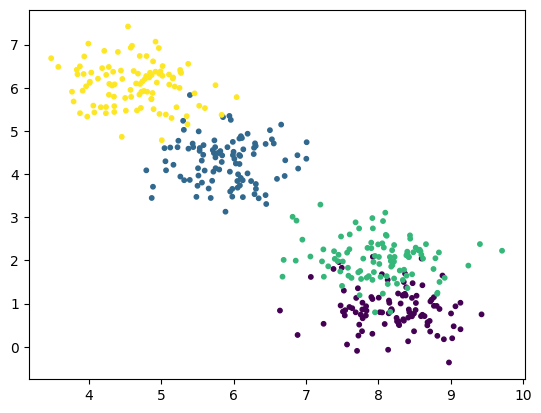

In [71]:
n = len(X_Y)
plt.scatter([X_Y[i][0][0] for i in range(n)], [X_Y[i][0][1] for i in range(n)], c=[X_Y[i][1] for i in range(n)], s=10)
plt.show()

### Обучающая и тестовая выборки.

In [72]:
X_train = []
y_train = []
X_test  = []
y_test = []
for row in X_Y:
    if random.random() < 0.3:
        X_test.append(row[0])
        y_test.append(row[1])
    else:
        X_train.append(row[0])
        y_train.append(row[1])

### Проверяю.

In [73]:
k = 10
y_predicted = get_knn_classes(X_train, y_train, X_test, k, classes_amount)
print(sum([int(y_predicted[i] == y_test[i]) for i in range(len(X_test))]) / float(len(X_test)))

0.9298245614035088


### Визуализация

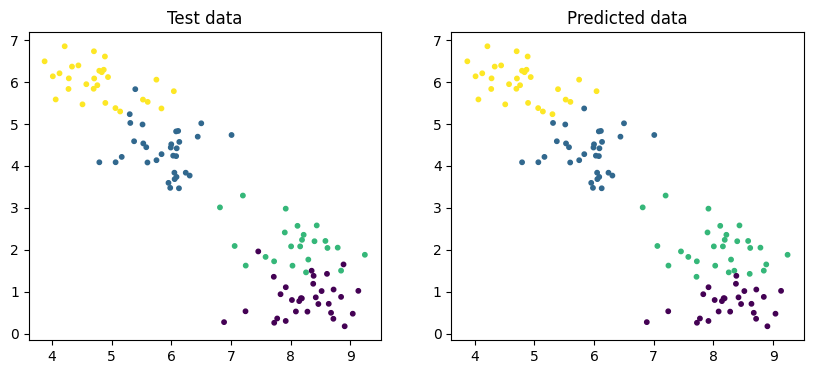

In [74]:
n = len(X_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter([X_test[i][0] for i in range(n)], [X_test[i][1] for i in range(n)], c=[y_test[i] for i in range(n)], s=10)
ax1.set_title('Test data')
ax2.scatter([X_test[i][0] for i in range(n)], [X_test[i][1] for i in range(n)], c=[y_predicted[i] for i in range(n)], s=10)
ax2.set_title('Predicted data')
plt.show()

## 1.3

Обучите на тех же данных классификатор с помощью встроенного класса KNeighborsClassifier.

### Классификатор с помощью встроенного класса.

In [75]:
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)
y_predicted_inbuild = knn.predict(X_test)

### Визуализация.

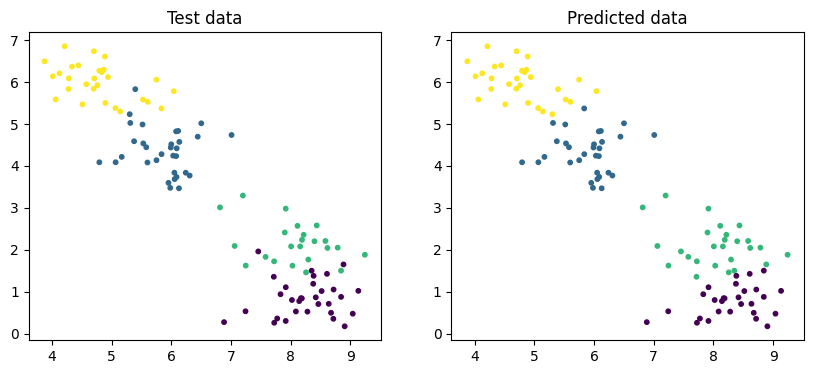

In [76]:
n = len(X_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter([X_test[i][0] for i in range(n)], [X_test[i][1] for i in range(n)], c=[y_test[i] for i in range(n)], s=10)
ax1.set_title('Test data')
ax2.scatter([X_test[i][0] for i in range(n)], [X_test[i][1] for i in range(n)], c=[y_predicted_inbuild[i] for i in range(n)], s=10)
ax2.set_title('Predicted data')
plt.show()

### Точность.

In [77]:
print(sum([int(y_predicted_inbuild[i] == y_test[i]) for i in range(len(X_test))]) / float(len(X_test)))

0.9298245614035088


#### Точность подсчитывет встроенный метод.

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted_inbuild)

0.9298245614035088

## 1.4

Сравните работу полученных моеделей.

### Проделаю все шаги, но уже создавая тестовый и тренировочные наборы данных, используя встроенный метод.

#### Получаю данные.

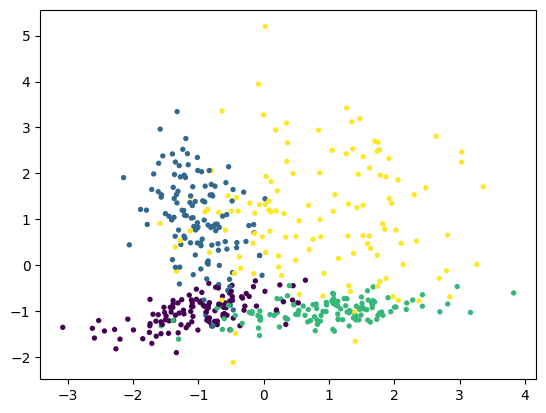

In [64]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                          n_redundant=0, n_classes=4, n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=8)

In [80]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=1)

#### Обучаю, используя свой и встроенный методы.

In [82]:
k = 10
n = 4

y_predicted_1 = get_knn_classes(X_train_1, y_train_1, X_test_1, k, classes_amount)

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train_1, y_train_1)
y_predicted_inbuild_1 = knn.predict(X_test_1)

#### Считаю точность.

In [84]:
print("My:", accuracy_score(y_test_1, y_predicted_1))
print("Inbuild", accuracy_score(y_test_1, y_predicted_inbuild_1))

My: 0.8466666666666667
Inbuild 0.88
